## Random Forest Algorithm

### 1. Load Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### 2. Load Data

In [2]:
# Load data
df = pd.read_csv('../2.Regression/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocessing of Data

In [3]:
# Preprocessing of data
# Creating 3 classes based on quality <= 4 , low; quality > 4 <= 8, medium else high
def create_level(x):
    # function to create levels basis wine quality
    if x <= 5:
        x = "low"
    elif x > 5 and x < 7:
        x = "medium"
    else:
        x = "high"
    return x

In [4]:
df['level'] = df['quality'].apply(lambda x: create_level(x))

In [5]:
print(df.quality.describe())
print(df.level.value_counts())

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
low       744
medium    638
high      217
Name: level, dtype: int64


In [6]:
# Encoding of categorical class variable to integers which will be used for feeding the model
le = LabelEncoder()
le_encoded = le.fit_transform(df['level'])
#le_encoded = le.transform(le)
print((le.classes_))
print(le_encoded)

['high' 'low' 'medium']
[1 1 1 ... 2 1 2]


### 4. Visualize Data

In [ ]:
# Explore data visually
# Build Correlation Matrix to
correlation = df.iloc[:,:10].corr()
#print(correlation)

fig , ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
sns.heatmap(correlation,annot=True,cmap="YlGnBu")

### 5. Split Data in Training & Testing samples

In [8]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:10],le_encoded,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1279, 10)
Shape of Test Xs:(320, 10)
Shape of Training y:(1279,)
Shape of Test y:(320,)


### 6. Build Random Forest Model

In [9]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy")
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [10]:
# Model diagnostic
print(score)
print(y_predicted)

0.728125
[2 2 1 1 2 0 1 1 1 1 2 2 1 0 1 1 1 2 1 2 1 2 0 1 1 1 2 2 1 1 1 1 2 1 2 0 2
 0 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 0 2 2 1 2 1 1 2 1 1 1 0 2 0 1 1 1 2
 2 2 0 2 2 1 2 2 1 1 2 2 0 2 1 2 0 1 2 1 1 1 2 2 1 2 0 1 2 1 2 1 1 2 1 1 1
 1 2 2 0 1 0 2 1 2 0 2 2 2 2 1 2 1 2 1 1 2 1 1 2 1 1 1 2 2 0 1 1 1 1 1 2 1
 1 2 1 1 2 2 1 1 2 1 1 1 1 1 0 1 1 0 2 2 1 1 2 1 2 2 0 0 1 2 1 2 2 1 0 0 2
 2 2 2 1 2 2 1 2 2 1 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 1 2 2 1 1 1 1 1 1 0 0 2
 2 1 1 1 2 2 2 0 1 1 1 1 1 2 1 1 2 2 2 1 2 1 2 2 0 2 2 2 2 2 1 1 2 1 0 1 1
 2 0 2 1 2 1 2 0 2 2 1 2 2 0 1 1 1 1 1 2 1 1 1 0 0 1 1 1 2 2 1 0 2 2 1 2 2
 1 1 0 2 2 1 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1]


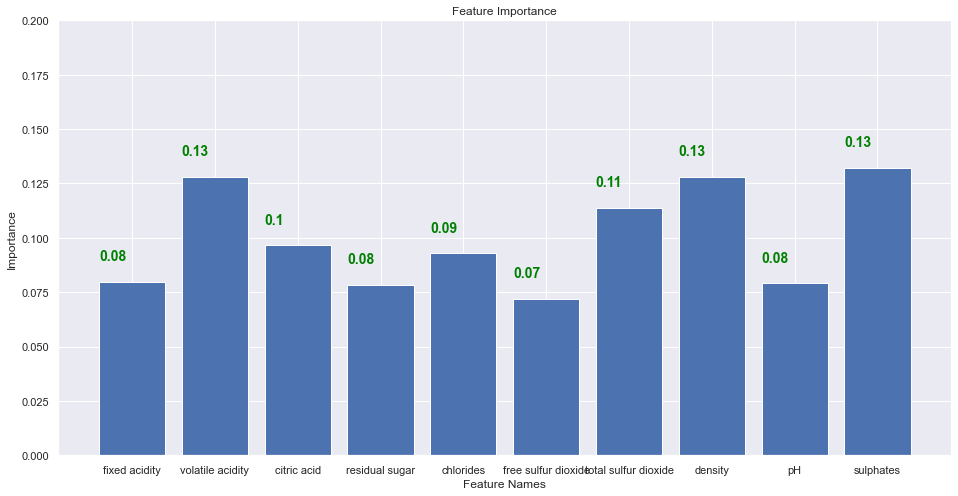

In [11]:
variableImp = pd.DataFrame({"Feature":df.columns[:10],"Importance":clf.feature_importances_})

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
ax.bar(x = variableImp.Feature, height = variableImp.Importance)
#ax.barh(x = df['Gender'], height = np.mean(df.score))
ax.set_title('Feature Importance')
ax.set_xlabel('Feature Names')
ax.set_ylabel('Importance')
ax.set_ylim(top = 0.2)
for i, v in enumerate(variableImp.Importance):
    ax.text(i-0.4, v + 0.01, s = np.round(v,2), color='green', fontweight='bold',fontsize=14)

### 7. Predict outcome using the Test Data

In [12]:
# Prediction on Test Data
y_predicted_labels = le.inverse_transform(y_predicted)
y_predicted_labels[0:10]

array(['medium', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [13]:
true_labels = le.inverse_transform(y_test)
true_labels[0:10]

array(['medium', 'medium', 'low', 'medium', 'medium', 'high', 'low',
       'low', 'low', 'low'], dtype=object)

### 8. Confusion Matrix

In [14]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(true_labels, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[ 25,   3,  17],
       [  2, 117,  25],
       [  7,  33,  91]])

In [15]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 25   3  17]
 [  2 117  25]
 [  7  33  91]]
Normalized confusion matrix
[[0.56 0.07 0.38]
 [0.01 0.81 0.17]
 [0.05 0.25 0.69]]


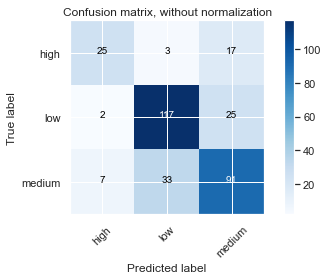

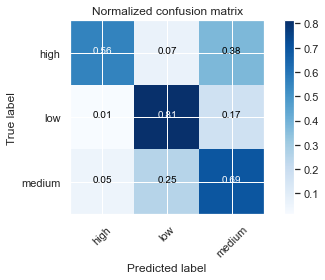

In [16]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=le.classes_,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= le.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Tuning of Hyper Parameters of Model

In [17]:
## Below packages are needed for Hyper Parameter Tuning of an Algorithm in Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [18]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.columns[0:10]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

# categorical_features = 
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        #('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state= 42))])

In [19]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__criterion': ["gini","entropy"],
    'classifier__max_features': ["auto","sqrt","log2"],
    'classifier__max_depth':[10,50,100],
    'classifier__n_estimators':[10,50,150,200]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False,verbose = 1,n_jobs= -1)
grid_search.fit(x_train, y_train)

print(("best Model from grid search: %.3f"
       % grid_search.score(x_test, y_test)))
# Print your best combination of hyper parameters
print("Optimum setting of hyperparameters:................")
grid_search.best_params_

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1342 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1892 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2542 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 10.2min finished
/Users/paragpradhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


best Model from grid search: 0.722
Optimum setting of hyperparameters:................


{'classifier__criterion': 'entropy',
 'classifier__max_depth': 50,
 'classifier__max_features': 'auto',
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'mean',
 'preprocessor__num__scaler': StandardScaler()}

In [ ]:
import joblib
joblib.dump(grid_search,"RandomForest.model")